


*   ***Rajat Kumar : 2048018***

*  ***Project On NLP (Part4)***
*   ***Youtube Comment Classification***








In [3]:
from google.colab import files
uploaded = files.upload()

Saving nlp_data.xlsx to nlp_data.xlsx


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

df = pd.read_excel("nlp_data.xlsx")

In [5]:
import nltk 
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 

import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# ***Text Cleaning/Tokenization***

In [7]:
def cleanText(rawText):
  temp = BeautifulSoup(rawText, "html.parser")
  letters_only = re.sub("[!\"#\$%&\\\\'\(\)\*\+\,\-\./:;<\=>?@\[\]\^_`\{|\}~0-9]", "", temp.get_text())
  lower_case = letters_only.lower()
  words = lower_case.split()
  words = [w for w in words if w not in stopwords.words("english")]
  return(" ".join(words))

In [8]:
cleanX = []
for i in df.text:
  cleanX.append(cleanText(i))

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.manoramaonline.com/homestyle/spot-light/2019/10/31/lekshmi-nair-house-in-kochi-celebrity-home.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


# ***Feature Extraction/Vectorization***

In [10]:
vectorizer = TfidfVectorizer(analyzer = "word",
                            preprocessor = None,
                            stop_words = "english",
                            use_idf = True)

In [11]:
train_data_features = vectorizer.fit_transform(cleanX)
train_data_features = train_data_features.toarray()
x_col = train_data_features
y_col = df.label

# ***Model Building***

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_col, y_col, test_size = 0.25, random_state = 42)

In [19]:
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Activation, LeakyReLU
from sklearn.metrics import accuracy_score, matthews_corrcoef

***MLP with tanh***

In [16]:
def build_tanh():
    model = Sequential()
    model.add(Dense(20, input_dim = x_train.shape[1], activation = "tanh"))# input layer
    model.add(Dense(20, activation = "tanh"))
    model.add(Dense(7, activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    model.summary()
    return model

clf1 = KerasClassifier(build_fn = build_tanh, epochs = 20, batch_size = 128)
clf1.fit(x_train, y_train)
y_pred = clf1.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                162620    
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 147       
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
26/26 [==============================] - 3s 4ms/step - loss: 1.9063 - accuracy: 0.3877
Epoch 2/20
26/26 [==============================] - 0s 4ms/step - loss: 1.6848 - accuracy: 0.4723
Epoch 3/20
26/26 [==============================] - 0s 4ms/step - loss: 1.4925 - accuracy: 0.4683
Epoch 4/20
26/26 [==============================] - 0s 3ms/step - loss: 1.3840 - accur

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
# Hyperparameter tuning using k-fold cross validation
kfold_model = KFold(n_splits = 10, random_state = 7)
kfold_result = cross_val_score(clf1, x_col, y_col, cv = kfold_model)
print("Accuracy: " + str(kfold_result.mean()*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                162620    
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 147       
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
31/31 [==============================] - 0s 4ms/step - loss: 1.9064 - accuracy: 0.3885
Epoch 2/20
31/31 [==============================] - 0s 4ms/step - loss: 1.6665 - accuracy: 0.4748
Epoch 3/20
31/31 [==============================] - 0s 4ms/step - loss: 1.4508 - accuracy: 0.4793
Epoch 4/20
31/31 [==============================] - 0s 4ms/step - loss: 1.3298 - acc

***MLP with relu***

In [20]:
def build_relu():
    model = Sequential()
    model.add(Dense(20, input_dim = x_train.shape[1], activation = "relu"))
    model.add(Dense(20, activation = "relu"))
    model.add(Dense(7, activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    model.summary()
    return model

clf2 = KerasClassifier(build_fn = build_relu, epochs = 10, batch_size = 128)
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 20)                162620    
_________________________________________________________________
dense_34 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_35 (Dense)             (None, 7)                 147       
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
26/26 [==============================] - 0s 4ms/step - loss: 1.9241 - accuracy: 0.4189
Epoch 2/10
26/26 [==============================] - 0s 4ms/step - loss: 1.7985 - accuracy: 0.4723
Epoch 3/10
26/26 [==============================] - 0s 4ms/step - loss: 1.6138 - accuracy: 0.4683
Epoch 4/10
26/26 [==============================] - 0s 4ms/step - loss: 1.4644 - ac

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [21]:
# Hyperparameter tuning using k-fold cross validation
kfold_model = KFold(n_splits = 10, random_state = 7)
kfold_result = cross_val_score(clf2, x_col, y_col, cv = kfold_model)
print("Accuracy: " + str(kfold_result.mean()*100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 20)                162620    
_________________________________________________________________
dense_37 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_38 (Dense)             (None, 7)                 147       
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 1.9291 - accuracy: 0.3982
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 1.8265 - accuracy: 0.4748
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 1.6417 - accuracy: 0.4792
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 1.4608 - ac

In [23]:
def build_leaky_relu():
    model = Sequential()
    model.add(Dense(20, input_dim = x_train.shape[1]))
    model.add(LeakyReLU(alpha = 0.05)) 
    model.add(Dense(20))
    model.add(LeakyReLU(alpha = 0.05)) 
    model.add(Dense(7, activation = "softmax"))
    model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
    model.summary()
    return model

clf3 = KerasClassifier(build_fn = build_leaky_relu, epochs = 10, batch_size = 128)
clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(matthews_corrcoef(y_test, y_pred))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 20)                162620    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_70 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 7)                 147       
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
26/26 [==============================] - 0s 4ms/step - loss: 1.9265 - accuracy: 0.3712
Epoch 2/10
26/2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
# Hyperparameter tuning using k-fold cross validation
kfold_model = KFold(n_splits = 10, random_state = 7)
kfold_result = cross_val_score(clf3, x_col, y_col, cv = kfold_model)
print("Accuracy: " + str(kfold_result.mean()*100.0))


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 20)                162620    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_73 (Dense)             (None, 20)                420       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 20)                0         
_________________________________________________________________
dense_74 (Dense)             (None, 7)                 147       
Total params: 163,187
Trainable params: 163,187
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
31/31 [==============================] - 0s 4ms/step - loss: 1.9289 - accuracy: 0.3669
Epoch 2/10
31/3

In [25]:
result = {'Model': ['MLP-tanh','MLP-Relu','MLP-LeakyRelu'],
        'MCC': [0.434,0.403,0.389],
        'ACC(%)':[62.72,62.44,61.78],
        'Av. ACC(%)':[60.84,60.91,60.82]
        }

df1 = pd.DataFrame(result, columns = ['Model', 'MCC', 'ACC(%)', 'Av. ACC(%)'])

df1.head()

,Model,MCC,ACC(%),Av. ACC(%)
0,MLP-tanh,0.434,62.72,60.84
1,MLP-Relu,0.403,62.44,60.91
2,MLP-LeakyRelu,0.389,61.78,60.82


In [26]:
# ROC Code

from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
# ROC area to multi-label classification, it is necessary to binarize the output.
y_bin = label_binarize(y_test, classes = [1, 2, 3, 4, 5, 6, 7])
n_classes = y_bin.shape[1]

print(y_bin)

[[0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [27]:
y_score = clf1.predict_proba(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


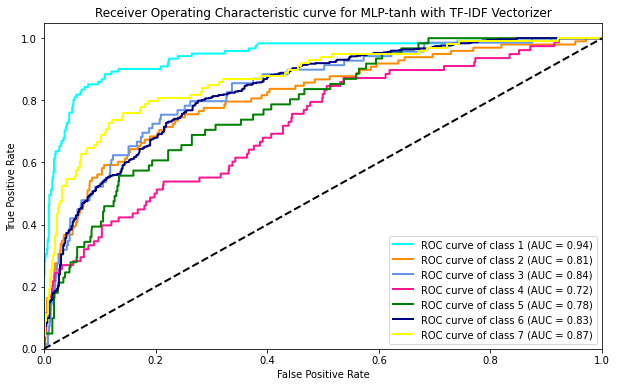

In [28]:
import matplotlib.pyplot as plt
from itertools import cycle

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig = plt.gcf()
fig.set_size_inches(10, 6)
lw = 2
colors = cycle(["aqua", "darkorange", "cornflowerblue", "deeppink", "green", "navy", "yellow"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = lw,
             label = "ROC curve of class {0} (AUC = {1:0.2f})"
             "".format(i + 1, roc_auc[i]))

plt.plot([0, 1], [0, 1], "k--", lw = lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic curve for MLP-tanh with TF-IDF Vectorizer")
plt.legend(loc = "lower right")
plt.savefig("roc_auc_rf_tf.png")
plt.show()

## ***Inference:***

From the above results we can say that all the deep learning models are in-comparison are performing well but MLP-tanh looks to be more balanced model although there isn't much difference between the model and the possibility of achieveing the accuracy by fluke can be negated using the argument that the average accuracy calculated using cross validation is comaprable to the accuracies achieved.